In [2]:
!pip install kaggle --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
# from google.colab import files
# uploaded = files.upload()

In [2]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/ 
# !chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [3]:
# !ls -1ha kaggle.json

ls: cannot access 'kaggle.json': No such file or directory


In [4]:
from google.colab import drive

ROOT = "/content/drive"
print(ROOT)
drive.mount(ROOT)

/content/drive
Mounted at /content/drive


In [ ]:
# !unzip '*.zip'

In [5]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 7.7 MB/s 


In [6]:
import numpy as np
import pandas as pd
from skimage.io import imread
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import os
import pydicom as dicom

In [7]:
PATH_overview = '/content/drive/MyDrive/PRACTICE/input/siim-medical-image'
data_df = pd.read_csv(os.path.join(PATH_overview, "overview.csv"))

In [8]:
print("CT medical iamges - rows:", data_df.shape[0]," columns:", data_df.shape[1])

CT medical iamges - rows: 100  columns: 8


In [9]:
data_df.head()

,Unnamed: 0,Age,Contrast,ContrastTag,raw_input_path,id,tiff_name,dicom_name
0,0,60,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (1).dcm,0,ID_0000_AGE_0060_CONTRAST_1_CT.tif,ID_0000_AGE_0060_CONTRAST_1_CT.dcm
1,1,69,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (10).dcm,1,ID_0001_AGE_0069_CONTRAST_1_CT.tif,ID_0001_AGE_0069_CONTRAST_1_CT.dcm
2,2,74,True,APPLIED,../data/50_50_dicom_cases\Contrast\00001 (11).dcm,2,ID_0002_AGE_0074_CONTRAST_1_CT.tif,ID_0002_AGE_0074_CONTRAST_1_CT.dcm
3,3,75,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (12).dcm,3,ID_0003_AGE_0075_CONTRAST_1_CT.tif,ID_0003_AGE_0075_CONTRAST_1_CT.dcm
4,4,56,True,NONE,../data/50_50_dicom_cases\Contrast\00001 (13).dcm,4,ID_0004_AGE_0056_CONTRAST_1_CT.tif,ID_0004_AGE_0056_CONTRAST_1_CT.dcm


In [10]:
%cd /content/drive/MyDrive/PRACTICE/input/siim-medical-image/tiff_images/

!unzip -qq '/content/drive/MyDrive/PRACTICE/input/siim-medical-image/tiff_images/*.zip'

/content/drive/MyDrive/PRACTICE/input/siim-medical-image/tiff_images
unzip:  cannot find or open /content/drive/MyDrive/PRACTICE/input/siim-medical-image/tiff_images/*.zip, /content/drive/MyDrive/PRACTICE/input/siim-medical-image/tiff_images/*.zip.zip or /content/drive/MyDrive/PRACTICE/input/siim-medical-image/tiff_images/*.zip.ZIP.

No zipfiles found.


In [11]:
PATH_tiff = '/content/drive/MyDrive/PRACTICE/input/siim-medical-image'

print("Number of TIFF images:", len(os.listdir(os.path.join(PATH_tiff, "tiff_images"))))

Number of TIFF images: 100


In [12]:
# tiff_data = pd.DataFrame([{'path': filepath}
#                           for filepath in glob(PATH_tiff+'tiff_images/*.tif')])
tiff_data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH_tiff+'tiff_images/*.tif')])

In [13]:
def process_data(path):
    data = pd.DataFrame([{'path': filepath} for filepath in glob(PATH_tiff+path)])
    data['file'] = data['path'].map(os.path.basename)
    data['ID'] = data['file'].map(lambda x: str(x.split('_')[1]))
    data['Age'] = data['file'].map(lambda x: int(x.split('_')[3]))
    data['Contrast'] = data['file'].map(lambda x: bool(int(x.split('_')[5])))
    data['Modality'] = data['file'].map(lambda x: str(x.split('_')[6].split('.')[-2]))
    return data

In [14]:
tiff_data = process_data('/tiff_images/*.tif')

In [15]:
tiff_data.head(10)

,path,file,ID,Age,Contrast,Modality
0,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0022_AGE_0074_CONTRAST_1_CT.tif,0022,74,True,CT
1,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0035_AGE_0059_CONTRAST_1_CT.tif,0035,59,True,CT
2,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0001_AGE_0069_CONTRAST_1_CT.tif,0001,69,True,CT
3,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0058_AGE_0082_CONTRAST_0_CT.tif,0058,82,False,CT
4,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0014_AGE_0071_CONTRAST_1_CT.tif,0014,71,True,CT
5,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0007_AGE_0061_CONTRAST_1_CT.tif,0007,61,True,CT
6,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0002_AGE_0074_CONTRAST_1_CT.tif,0002,74,True,CT
7,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0018_AGE_0074_CONTRAST_1_CT.tif,0018,74,True,CT
8,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0009_AGE_0048_CONTRAST_1_CT.tif,0009,48,True,CT
9,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0055_AGE_0071_CONTRAST_0_CT.tif,0055,71,False,CT


In [16]:
PATH_dicom = '/content/drive/MyDrive/PRACTICE/input/siim-medical-image'
print("Number of DICOM filkes:", len(os.listdir(os.path.join(PATH_dicom, "dicom_dir"))))

Number of DICOM filkes: 100


In [17]:
dicom_data = process_data('/dicom_dir/*.dcm')

In [18]:
dicom_data.head(10)

,path,file,ID,Age,Contrast,Modality
0,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0017_AGE_0060_CONTRAST_1_CT.dcm,0017,60,True,CT
1,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0006_AGE_0075_CONTRAST_1_CT.dcm,0006,75,True,CT
2,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0001_AGE_0069_CONTRAST_1_CT.dcm,0001,69,True,CT
3,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0009_AGE_0048_CONTRAST_1_CT.dcm,0009,48,True,CT
4,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0000_AGE_0060_CONTRAST_1_CT.dcm,0000,60,True,CT
5,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0019_AGE_0070_CONTRAST_1_CT.dcm,0019,70,True,CT
6,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0021_AGE_0067_CONTRAST_1_CT.dcm,0021,67,True,CT
7,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0002_AGE_0074_CONTRAST_1_CT.dcm,0002,74,True,CT
8,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0007_AGE_0061_CONTRAST_1_CT.dcm,0007,61,True,CT
9,/content/drive/MyDrive/PRACTICE/input/siim-med...,ID_0016_AGE_0063_CONTRAST_1_CT.dcm,0016,63,True,CT


In [19]:
def countplot_comparison(feature):
  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,4))
  s1 = sns.countplot(data_df[feature], ax=ax1)
  s1.set_title("Overview data")
  s2 = sns.countplot(tiff_data[feature], ax=ax2)
  s2.set_title("Tiff files data")
  s3 = sns.countplot(dicom_data[feature], ax=ax3)
  s3.set_title("Dicom files data")
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


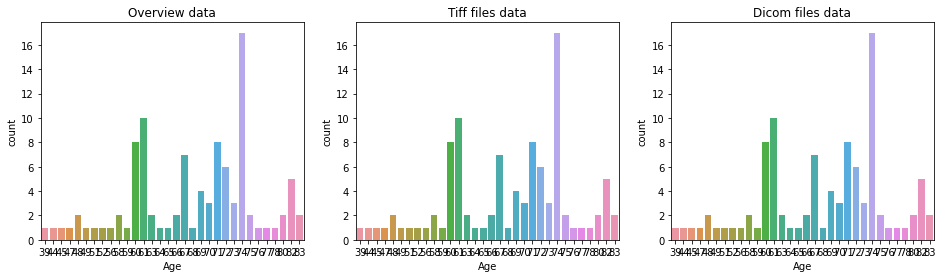

In [20]:
countplot_comparison('Age')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


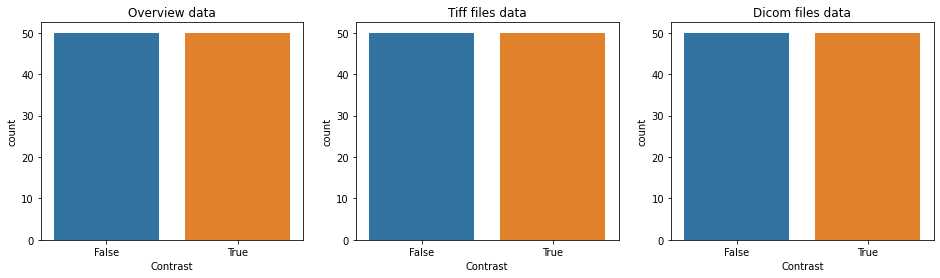

In [21]:
countplot_comparison('Contrast')

In [28]:
def show_images(data, dim=16, imtype='TIFF'):
    img_data = list(data[:dim].T.to_dict().values())
    f, ax = plt.subplots(4,4, figsize=(16,20))
    for i,data_row in enumerate(img_data):
        if(imtype=='TIFF'): 
            data_row_img = imread(data_row['path'])
        elif(imtype=='DICOM'):
            data_row_img = dicom.read_file(data_row['path'])
        if(imtype=='TIFF'):
            ax[i//4, i%4].matshow(data_row_img,cmap='gray')
        elif(imtype=='DICOM'):
            ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap=plt.cm.bone) 
        ax[i//4, i%4].axis('off')
        ax[i//4, i%4].set_title('Modality: {Modality} Age: {Age}\nSlice: {ID} Contrast: {Contrast}'.format(**data_row))
    plt.show()

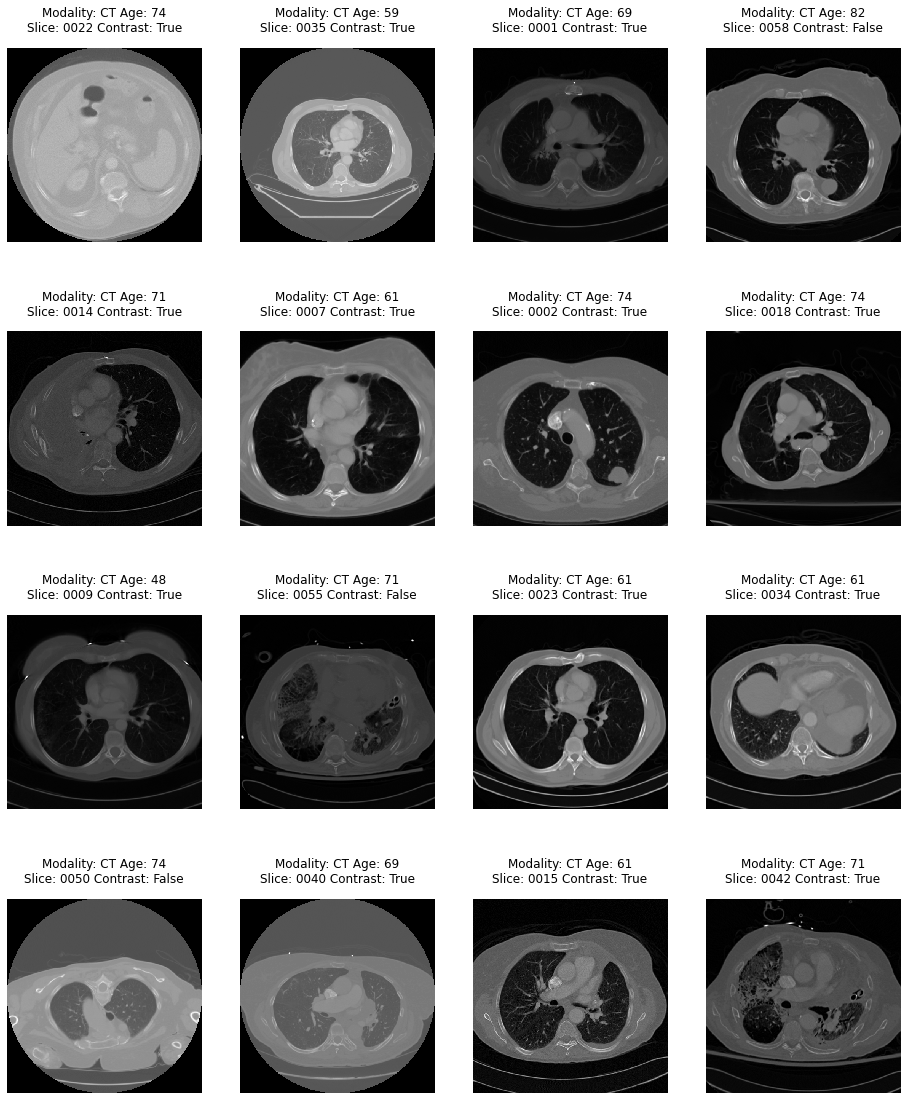

In [31]:
show_images(tiff_data, 16, 'TIFF')

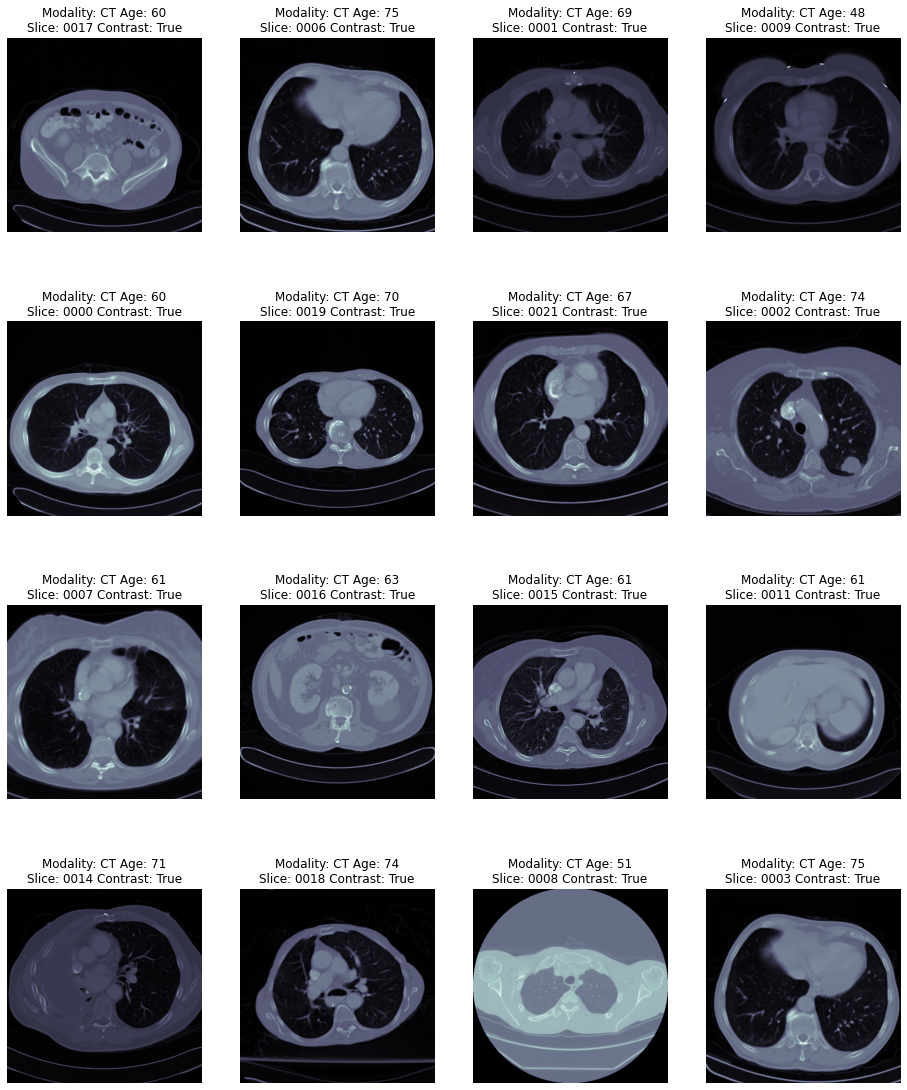

In [85]:
show_images(dicom_data,16,'DICOM')

In [ ]:
dicom_file_path = list(dicom_data[:1].T.to_dict().values())[0]['path']
dicom_file_dataset = dicom.read_file(dicom_file_path)
dicom_file_dataset

In [76]:
print("Modality: {}\nManufacturer: {}\nPatient Age: {}\nPatient Sex:: {}\nPatient Name: {}\nPatient ID: {}".format(
      dicom_file_dataset.Modality,
      dicom_file_dataset.Manufacturer,
      dicom_file_dataset.PatientAge,
      dicom_file_dataset.PatientSex,
      dicom_file_dataset.PatientName,
      dicom_file_dataset.PatientID))

Modality: CT
Manufacturer: SIEMENS
Patient Age: 060Y
Patient Sex:: M
Patient Name: TCGA-17-Z034
Patient ID: TCGA-17-Z034


In [81]:
def show_dicom_images(data):
  img_data = list(data[:16].T.to_dict().values())
  f, ax = plt.subplots(4,4, figsize = (16,20))
  for i,data_row in enumerate(img_data):

    data_row_img = dicom.read_file(data_row['path'])
    modality = data_row_img.Modality
    age = data_row_img.PatientAge

    ax[i//4, i%4].imshow(data_row_img.pixel_array, cmap = plt.cm.bone)
    ax[i//4, i%4].axis('off')
    ax[i//4, i%4].set_title('Modality: {} Age: {}\nSlice: {} Contrast: {}'.format(
        modality, age, data_row['ID'], data_row['Contrast']))
  plt.show()



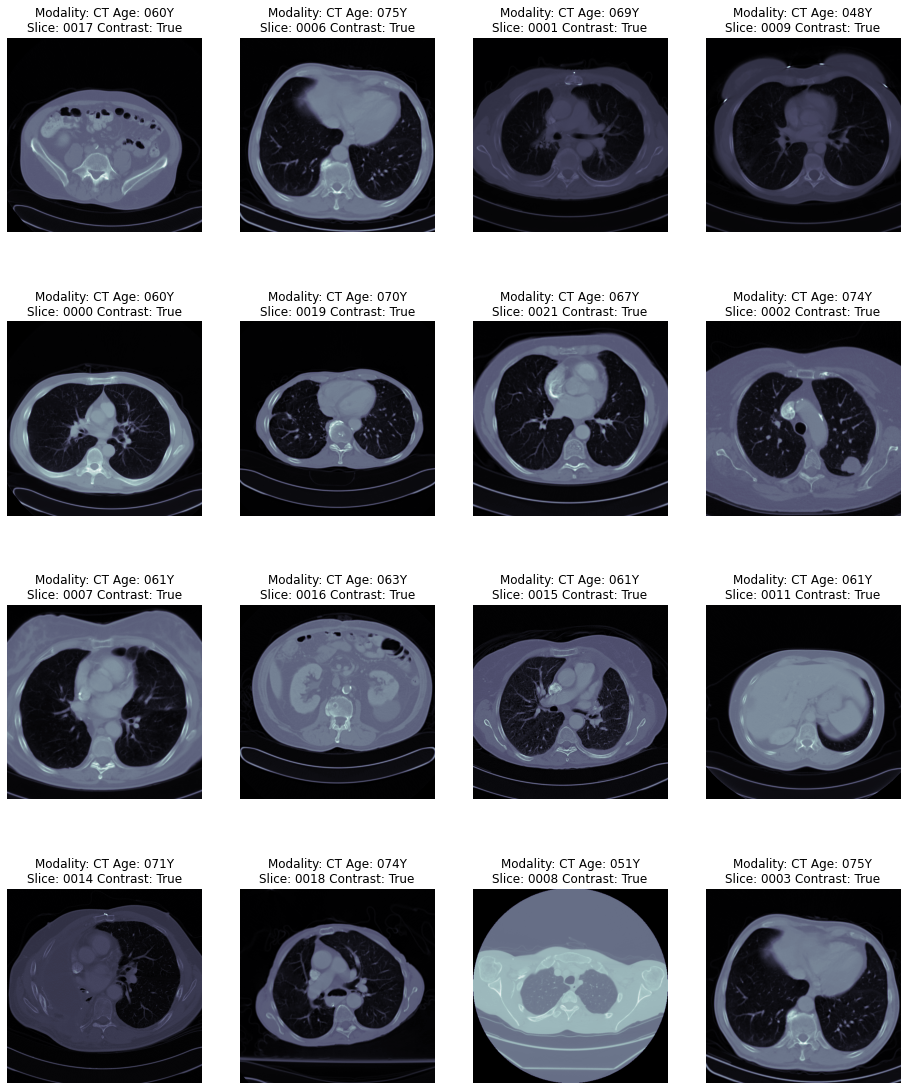

In [84]:
show_dicom_images(dicom_data)

In [ ]:
##Plus, The code bellow shows how a Dicom 2D image subset is used to create a 3D scene

# extract voxel data  
def extract_voxel_data(list_of_dicom_files):  
    datasets = [dicom.read_file(f) for f in list_of_dicom_files]  
     try:  
         voxel_ndarray, ijk_to_xyz = dicom_numpy.combine_slices(datasets)  
     except dicom_numpy.DicomImportException as e:  
     # invalid DICOM data  
         raise  
     return voxel_ndarray  